In [1]:
import tensorflow as tf
from sklearn.datasets import make_circles


In [2]:
n_sample = 1000

X, y = make_circles(n_sample,
                    noise=0.03,
                    random_state=42)

In [3]:
import pandas as pd

circles = pd.DataFrame({'x0':X[:,0], 'x1':X[:,1], 'label':y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


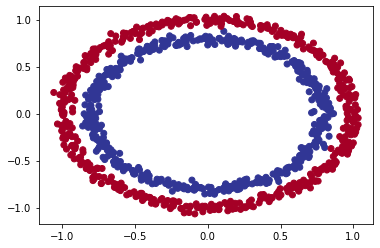

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1] ,c = y ,cmap=plt.cm.RdYlBu); # color map : red yellow blue

In [5]:
#input shape
X[0].shape 

(2,)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.2, random_state=42
)

In [7]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'), # binaryclsssification use SIGMOID for activation function
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

In [8]:
history = model.fit(X_train,y_train, epochs=15, verbose=1)

Epoch 1/15
25/25 [==============================] - 0s 667us/step - loss: 0.6798 - accuracy: 0.6087
Epoch 2/15
25/25 [==============================] - 0s 681us/step - loss: 0.6588 - accuracy: 0.6087
Epoch 3/15
25/25 [==============================] - 0s 1ms/step - loss: 0.6203 - accuracy: 0.7788
Epoch 4/15
25/25 [==============================] - 0s 1ms/step - loss: 0.5530 - accuracy: 0.8475
Epoch 5/15
25/25 [==============================] - 0s 1ms/step - loss: 0.4401 - accuracy: 0.9525
Epoch 6/15
25/25 [==============================] - 0s 1ms/step - loss: 0.3319 - accuracy: 0.9438
Epoch 7/15
25/25 [==============================] - 0s 692us/step - loss: 0.2202 - accuracy: 0.9887
Epoch 8/15
25/25 [==============================] - 0s 697us/step - loss: 0.1364 - accuracy: 0.9975
Epoch 9/15
25/25 [==============================] - 0s 1ms/step - loss: 0.0903 - accuracy: 0.9987
Epoch 10/15
25/25 [==============================] - 0s 1ms/step - loss: 0.0716 - accuracy: 0.9975
Epoch 11/15

In [9]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 0s/step - loss: 0.0440 - accuracy: 1.0000


[0.044037189334630966, 1.0]

Text(0.5, 0, 'epoch')

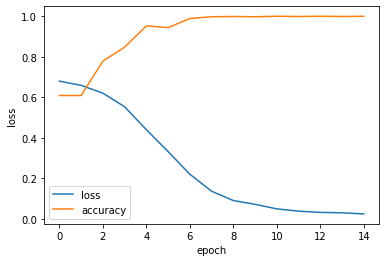

In [10]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epoch')

In [11]:
y_pred = model.predict(X_test)

y_pred[:10] , y_test[:10]

(array([[0.9973563 ],
        [0.15462619],
        [0.99716055],
        [0.00257644],
        [0.95752203],
        [0.96663976],
        [0.00972795],
        [0.00187925],
        [0.99009705],
        [0.09719902]], dtype=float32),
 array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64))

In [12]:
import numpy as np

y_pred = np.round(y_pred)
y_pred[:10]

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [13]:
y_pred = tf.squeeze(y_pred)

In [14]:
y_pred[:10] == y_test[:10]

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

In [15]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape) # round = [-1.5413896] [-1.4965922] ->  [-2] [-1]
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7) #plot boundary
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu) # plot X,y
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...
doing binary classifcation...


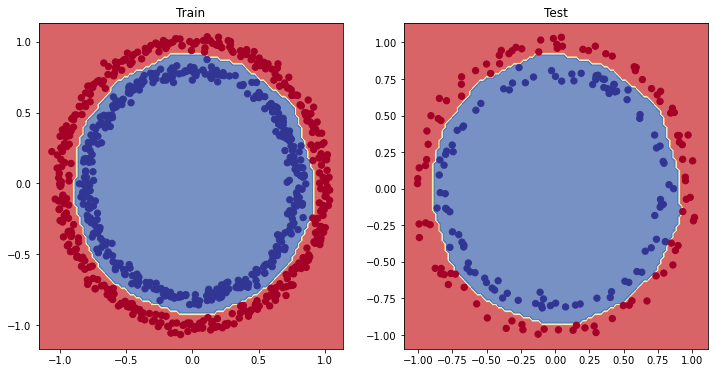

In [16]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model, X_train,y_train)

plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model, X_test,y_test)
plt.show();

### Finding the best learning rate ''A learning rate callback''

In [17]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'), # binaryclsssification use SIGMOID for activation function
])

 # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

history = model.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7054 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 677us/step - loss: 0.7030 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 696us/step - loss: 0.7006 - accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 689us/step - loss: 0.6984 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6959 - accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5000 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5000 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.5000 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step -

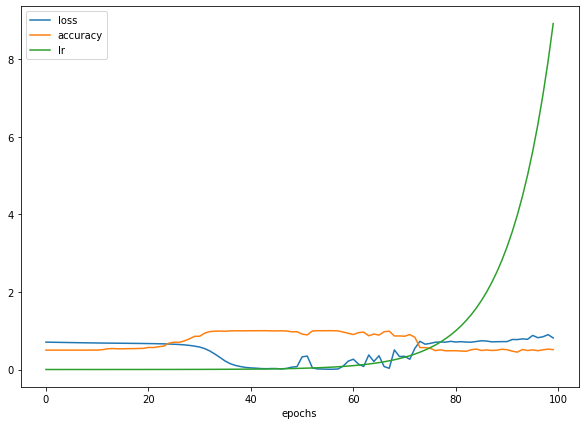

In [18]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

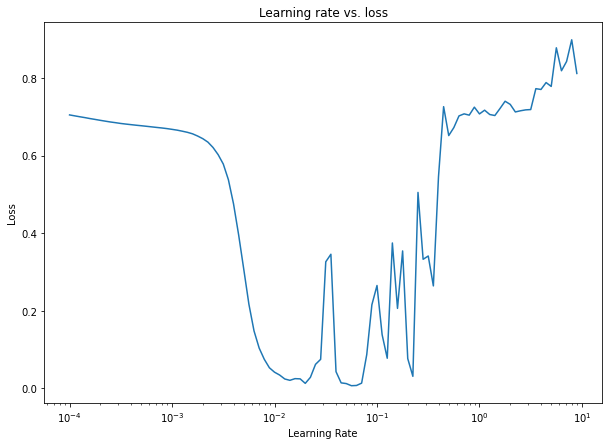

In [19]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In this case, our ideal learning rate ends up between 0.01 and 0.02

In [20]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'), # binaryclsssification use SIGMOID for activation function
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=2e-2),
              metrics=['accuracy'])

history = model.fit(X_train,y_train,epochs=10)

Epoch 1/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6716 - accuracy: 0.5987
Epoch 2/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6121 - accuracy: 0.7175
Epoch 3/10
25/25 [==============================] - 0s 1ms/step - loss: 0.4873 - accuracy: 0.8825
Epoch 4/10
25/25 [==============================] - 0s 1ms/step - loss: 0.2691 - accuracy: 0.9762
Epoch 5/10
25/25 [==============================] - 0s 1ms/step - loss: 0.1255 - accuracy: 0.9887
Epoch 6/10
25/25 [==============================] - 0s 1ms/step - loss: 0.0648 - accuracy: 0.9962
Epoch 7/10
25/25 [==============================] - 0s 887us/step - loss: 0.0395 - accuracy: 0.9987
Epoch 8/10
25/25 [==============================] - 0s 1ms/step - loss: 0.0318 - accuracy: 0.9987
Epoch 9/10
25/25 [==============================] - 0s 1ms/step - loss: 0.0218 - accuracy: 0.9987
Epoch 10/10
25/25 [==============================] - 0s 1ms/step - loss: 0.0282 - accuracy: 0.9950


In [21]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 0s/step - loss: 0.0431 - accuracy: 0.9900


[0.04312039539217949, 0.9900000095367432]

just 10 epoch with 0.02 ideal learning rate for 0.99 accuracy

doing binary classifcation...
doing binary classifcation...


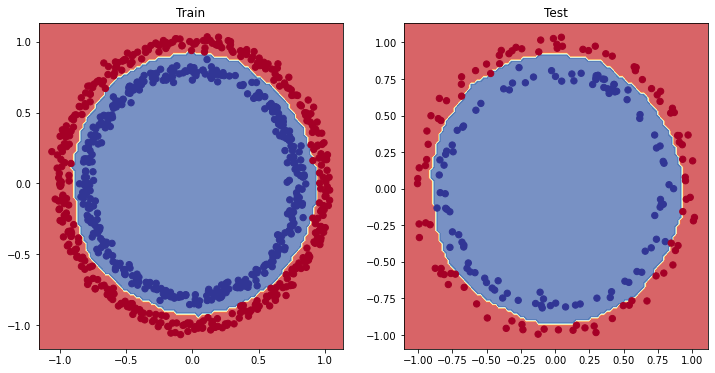

In [22]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X=X_train, y=y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X=X_test, y=y_test)
plt.show()

### Confusion Metrix

In [23]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred[:10], y_test[:10]

(array([[0.998683  ],
        [0.13988107],
        [0.9985734 ],
        [0.00338313],
        [0.9919776 ],
        [0.9789102 ],
        [0.00245562],
        [0.00230637],
        [0.9978939 ],
        [0.05233008]], dtype=float32),
 array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64))

convert y_pred to binary(0 or 1) same as y_test before use Confusion Metrix
* tf.round(y_pred)

In [24]:
y_pred = tf.round(y_pred)
y_pred[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [25]:
confusion_matrix(y_test, y_pred)

array([[ 98,   2],
       [  0, 100]], dtype=int64)

Prettify Confusion Metrix

In [58]:
cm = confusion_matrix(y_test, tf.round(y_pred))
print(f'{cm}\n')
print(f'axis 0 {cm.sum(axis=0)}\n')
print(f'axis 1 {cm.sum(axis=1)}\n')
cm_norm = cm.astype("float") / cm.sum(axis=1)
print(cm_norm,'\n')

cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
print(cm_norm)

[[ 98   2]
 [  0 100]]

axis 0 [ 98 102]

axis 1 [100 100]

[[0.98 0.02]
 [0.   1.  ]] 

[[0.98 0.02]
 [0.   1.  ]]


numpy.newaxis is used to increase the dimension of the existing array by one more dimension

In [76]:
a = np.array([0,2,4,8])
print(a,'\n')
print(a[:,np.newaxis],'\n')
print(a[np.newaxis,:])

[0 2 4 8] 

[[0]
 [2]
 [4]
 [8]] 

[[0 2 4 8]]


In [33]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools

def plot_confusin_metrix(y_test, y_pred, classes=None, figsize=(10,10),text_size=15):
    
  # Create the confusion matrix
  cm = confusion_matrix(y_test, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it , axis 1 = sum row
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

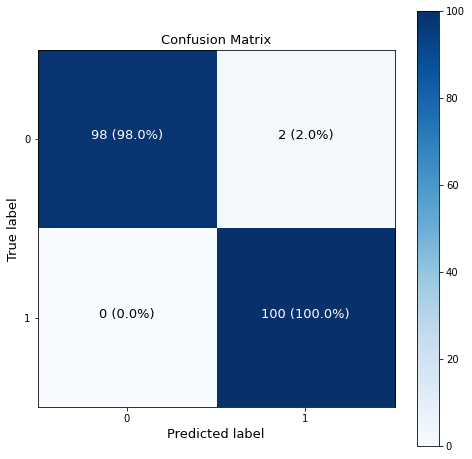

In [34]:
plot_confusin_metrix(y_test,y_pred,figsize=(8,8),text_size=13)